In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import cPickle as pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
'''
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("MNIST_data/train", images=images, labels=labels)
'''
1

1

In [31]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)
        
def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')
plt.gray()
plt.close()

In [4]:
data = np.load("MNIST_data/train.npz")
images=data['images']
labels=data['labels']
n=len(images)
images.shape

(55000, 28, 28)

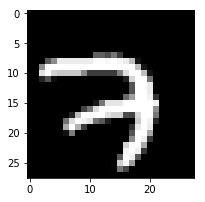

In [5]:
plot(images[0])

In [6]:
# images[0]

In [7]:
labels[0]

7

In [8]:
top = [
        [-1,-1,-1],
        [ 1, 1 ,1],
        [ 0, 0 ,0]
      ]

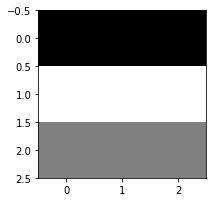

In [9]:
plot(top)

In [10]:
r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

interactive(children=(IntSlider(value=0, description=u'x1', max=28), IntSlider(value=28, description=u'x2', max=28), IntSlider(value=0, description=u'y1', max=28), IntSlider(value=28, description=u'y2', max=28), Output()), _dom_classes=('widget-interact',))

In [11]:
plots(images[:5],titles=labels[:5])

In [12]:
k = w.kwargs
k

{'x1': 0, 'x2': 28, 'y1': 0, 'y2': 28}

In [13]:
k['x1']

0

In [14]:
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
dims

(slice(0, 28, 1), slice(0, 28, None))

In [15]:
??np.index_exp

In [16]:
images[0].shape

(28, 28)

In [17]:
images[0][dims].shape

(28, 28)

In [18]:
# images[0][dims]

In [19]:
corrtop = correlate(images[0],top)

In [20]:
# corrtop[dims]

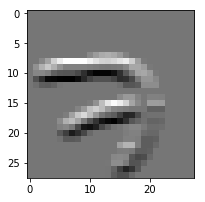

In [21]:
plot(corrtop)

In [22]:
np.rot90(top,0)

array([[-1, -1, -1],
       [ 1,  1,  1],
       [ 0,  0,  0]])

In [23]:
diag = [[0,  0,    1],
        [0,  1, -1.5],
        [1, -1.5, 0]]

In [24]:
straight_filters = [np.rot90(top,i) for i in range(4)]

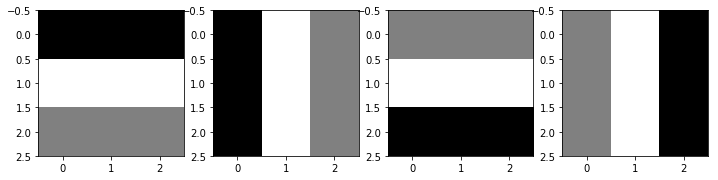

In [32]:
plots(straight_filters)

In [26]:
diagonal_filters = [np.rot90(diag,i) for i in range(4)]

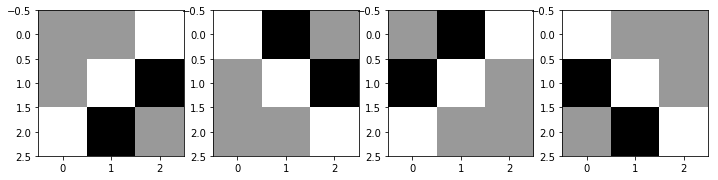

In [33]:
plots(diagonal_filters)

In [28]:
filters = straight_filters + diagonal_filters

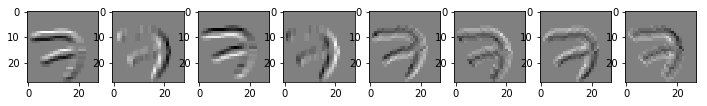

In [40]:
corrs = [correlate(images[0],each) for each in filters]
plots(corrs)